In [2]:
#Определение оптимального кол-ва кластеров

In [1]:
# Общие функции кластеризации
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist


from sklearn import mixture

# Для загрузки данных из xls документа
import pandas as pd

# Для отрисовки графиков
from pylab import *

In [2]:
# Настройка шрифтов для будущих графиков
rcParams['font.family'] = 'DejaVu Sans' # Понимает русские буквы
rcParams['font.size'] = 16

In [3]:
# Загрузим данные из xls документа
data = pd.read_excel('Works.xls')

# Выделим данные, начиная с первой колонки
data_for_clust =  data.ix[:,1:].as_matrix()

C:\Users\Aleksandre\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [4]:
#Наши ланные
data_for_clust

array([[  58.04597701,   65.59      ,   59.5       ,   76.19047619],
       [  23.56321839,   64.        ,   65.5       ,   85.71428571],
       [  52.29885057,   62.89      ,   26.7       ,   78.75457875],
       [  51.14942529,   61.21      ,   56.4       ,   70.6959707 ],
       [  26.43678161,   59.5       ,   64.9       ,   71.79487179],
       [  13.2183908 ,   58.46      ,   54.5       ,   64.46886447],
       [  32.75862069,   57.        ,   55.6       ,   65.93406593],
       [ 100.        ,   56.8       ,   26.4       ,   52.38095238],
       [  28.16091954,   55.81      ,   61.7       ,   79.12087912],
       [  81.6091954 ,   55.5       ,   47.4       ,   59.70695971],
       [  16.09195402,   54.4       ,   57.4       ,   84.61538462],
       [   4.59770115,   53.3       ,   47.6       ,   73.62637363],
       [  33.33333333,   53.2       ,   30.8       ,   61.17216117],
       [  45.40229885,   52.91      ,   71.        ,   78.38827839],
       [  18.96551724,   52.83    

In [5]:
# Вычислим расстояния между каждым набором данных,
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(data_for_clust, 'euclidean')

# Объеденеие элементов в кластеры
data_linkage = linkage(data_dist, method='average')

In [6]:
data_dist

array([ 36.30828679,  33.50722436,  10.32213235, ...,  17.73035701,
        41.71758156,  55.14654761])

In [7]:
data_linkage

array([[  41.        ,   46.        ,    2.7964919 ,    2.        ],
       [  22.        ,   30.        ,    4.084225  ,    2.        ],
       [  26.        ,   42.        ,    4.62601945,    2.        ],
       [  52.        ,   57.        ,    4.67866539,    2.        ],
       [  51.        ,   56.        ,    4.73141146,    2.        ],
       [  66.        ,   69.        ,    5.55779667,    2.        ],
       [  29.        ,   38.        ,    5.61712477,    2.        ],
       [  37.        ,   50.        ,    5.65869494,    2.        ],
       [  19.        ,   21.        ,    5.84452772,    2.        ],
       [  84.        ,   87.        ,    7.13271542,    4.        ],
       [  55.        ,   61.        ,    7.79413706,    2.        ],
       [  17.        ,   34.        ,    7.89651429,    2.        ],
       [   8.        ,   88.        ,    7.96281554,    3.        ],
       [  45.        ,   47.        ,    7.98152081,    2.        ],
       [  35.        ,   82.      

In [8]:
def wgss(data, groups):
    _data = np.array(data)
    res = 0.0
    for cluster in groups:
        inclust = _data[np.array(groups) == cluster]
        meanval = np.mean(inclust, axis=0)
        res += np.sum((inclust - meanval) ** 2)
    return res

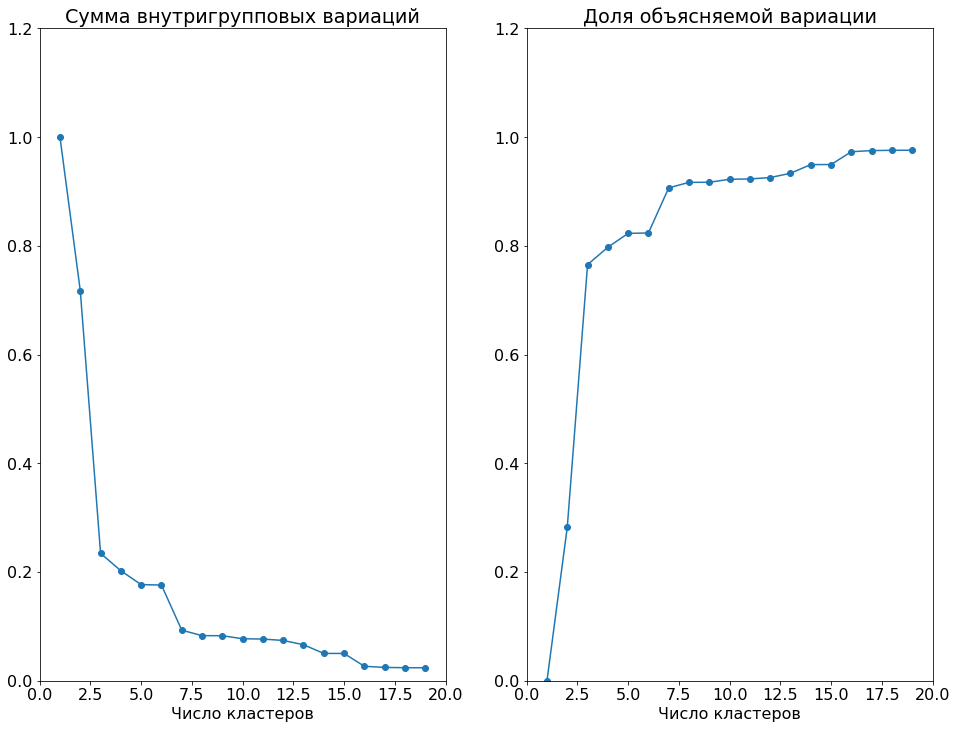

In [9]:
elbow = [np.nan, wgss(data_for_clust, [1]*len(data_for_clust[:,1]))]
for k in range(2, 20):
    groups = fcluster(data_linkage, k, criterion='maxclust')
    elbow.append(wgss(data_for_clust, groups))

fig = figure(figsize=(16, 12))
ax = fig.add_subplot('121') # 2 графика в строке, выбираем первый график
elbow = np.array(elbow) 
ax.plot(elbow/np.nanmax(elbow),'o', ls='solid')
ax.set_xlim([0, 20])
ax.set_ylim([0, 1.2])
ax.set_title(u'Сумма внутригрупповых вариаций')
ax.set_xlabel(u'Число кластеров')

ax1 = fig.add_subplot('122') # выбираем второй график в строке

ax1.plot((elbow[1]-elbow)/np.nanmax(elbow),'o', ls='solid') 
ax1.set_xlim([0, 20])
ax1.set_ylim([0, 1.2])
ax1.set_xlabel(u'Число кластеров')
ax1.set_title(u'Доля объясняемой вариации')

plt.show()

In [ ]:
#слева – изменение суммы внутригрупповых вариаций, справа – доля внутригрупповой вариации данных относительно общей их вариации.
#оптимальные значения 1<k<9;k=15;k=13

In [11]:
#k-means кластеризация

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
  
# read data (drop last empty column, caused by an extra (last) colon in the header)
data = pd.read_excel('Works.xls').dropna(axis=1, how='all')
  
# normalize data
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('Republic', 1))
  
# clustering
n_clusters = 11
km = KMeans(n_clusters=n_clusters)
  
# fit & predict clusters
data['cluster'] = km.fit_predict(X)
  
# results - we should have 11 clusters
print(data[:80])
  
# cluster's centroids
print(km.cluster_centers_)

                                    Republic     Culture  lvl_live  Mdeical  \
0                       Республика Татарстан   58.045977     65.59     59.5   
1                       Белгородская область   23.563218     64.00     65.5   
2                         Краснодарский край   52.298851     62.89     26.7   
3                        Воронежская область   51.149425     61.21     56.4   
4                           Липецкая область   26.436782     59.50     64.9   
5   Ханты-Мансийский авторонмый округ - Югра   13.218391     58.46     54.5   
6                    Калининградская область   32.758621     57.00     55.6   
7                       Свердловская область  100.000000     56.80     26.4   
8                          Тюменская область   28.160920     55.81     61.7   
9                      Нижегородская область   81.609195     55.50     47.4   
10                           Курская область   16.091954     54.40     57.4   
11           Ямало-Ненецкий автономный округ    4.59

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e;%.18e;%.18e;%.18e;%.18e;%.18e')